In [2]:
 import sklearn.datasets as dts
import numpy as np

import pandas as pd


In [3]:
data=dts.load_diabetes()

In [4]:
X=pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
Y=pd.DataFrame(data.target,columns=["MEDV"]) #### a expliquer
Y=Y["MEDV"]


In [7]:
Y=(Y-np.mean(Y))/np.std(Y)



In [8]:
Y

0     -0.014719
1     -1.001659
2     -0.144580
3      0.699513
4     -0.222496
         ...   
437    0.335904
438   -0.625064
439   -0.261454
440    0.881318
441   -1.235408
Name: MEDV, Length: 442, dtype: float64

In [9]:
Y=Y.to_numpy() 

In [10]:
X=X.to_numpy() 

In [11]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=20,random_state=40) ######### random_state ==== le choix sera aleatoire 


In [14]:
from sklearn.linear_model import LinearRegression as LR

regL=LR()
regL.fit(Xtrain,Ytrain)

LinearRegression()

In [15]:
print(regL.coef_)

[  0.14852011  -3.3305229    6.6820164    4.70734841 -11.58192945
   6.8065852    1.52528418   2.53021013  10.01798256   0.5723796 ]


In [16]:
regL.intercept_

-0.003038205294102297

In [17]:
from sklearn.metrics import mean_squared_error as mse 
###erreur quadratique moyenne

erreur_RL=mse(Ytest,regL.predict(Xtest))
erreur_RL

1.1375869171535957

In [18]:
class MeraRidge:
    
    def __init__(self,alpha=1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
       
       
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
        
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [19]:
###REgularisation 
#################



### on cherche les W

lmds=np.logspace(-4,4,50) ####pour les valeur de lambda ou bien alpha generer de 1à ala puissance -4 jusqu'a 10 a la puissance 4
erreurs=[]
ws=[]

#reg=Ridge()
reg=MeraRidge()
emin =1000
w_optx=[]



for lm in lmds:
  reg.alpha=lm
  reg.fit(Xtrain,Ytrain)
  e=mse(Ytest,reg.predict(Xtest))
  erreurs.append(e)
  ws.append(reg.coef_)
  if(e<emin):
    emin=e
    w_optx=reg.coef_

In [20]:
Xtrain.shape


(422, 10)

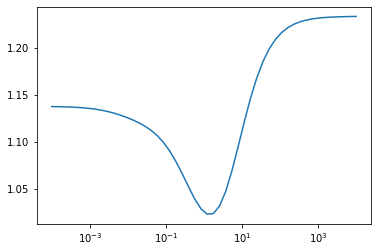

In [21]:
import matplotlib.pyplot as ppt

f=ppt.gca()
f.plot(lmds,erreurs)
f.set_xscale('log')

In [22]:
w_optx

array([ 0.55438184, -0.91359829,  3.63176338,  2.60431652,  0.01785963,
       -0.35372163, -1.94603447,  1.45746022,  3.10831719,  1.32070215])